# Test 1 SOM on Kepler and TESS Data

The first test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset without under-sampling, with all the characteristics and initializing the weights of the SOM with 50% composed of Planet values ​​taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0'])

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag']

In [6]:
X_train = X_train.values
y_train = y_train.drop(columns='Unnamed: 0').values

In [7]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  11038
Number of X_test:  2760
Number of features:  17


# Grid Search

In [30]:
param_grid = {
    'W': [None],
    'max_iter': [1000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [6, 10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [0.9],
    'W_FALSE_PLANET': [1],
    'K': [3, 5, 7, 11]
}

In [31]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.manhattan_distance at 0x2b3852fc0700>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b3852fc0700>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 7}
# Best accuracy: 0.775

Fitting 1 folds for each of 288 candidates, totalling 288 fits


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.007467
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.390110
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.264835
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.382673


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.133375
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.463567
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    4.956993
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    3.963918


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    4.545379
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    4.254791
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    4.698561
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    4.940730


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    3.804305
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    3.730246
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    3.905296
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    3.871315


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    5.585838
SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    5.355199
SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    5.666900
SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    5.491904


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    4.920520
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    4.659771
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    4.706690
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    4.858100


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.721831


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.773847


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    5.228223
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    5.193066


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    4.711710
SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    4.856507


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    3.889938
SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    3.816573


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    8.188196
SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    8.310490


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    7.964875
SOM training completed:  01000  | QE:    0.000006  | LR:    0.000800  | NR:    1.000000  | Time:    7.737344


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.644492
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.914714
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.776391


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.433064


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    5.673288
SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    5.782786
SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    5.667521


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000014  | LR:    0.000800  | NR:    1.000000  | Time:    5.598650


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.769592
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.511244
SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.830199


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000013  | LR:    0.000800  | NR:    1.000000  | Time:    4.777423


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    6.920337
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    7.092372
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    6.926374


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    6.775549


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    5.855079
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    5.863726
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    5.852010


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    5.878141


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    5.759013
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    5.985610
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    6.491473


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    6.395760


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    4.754266
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    4.915734
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    4.922398


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    5.030899


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.801225
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:   10.287617
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.962208


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.178313


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    7.643809
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    7.965124
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    7.731919


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    8.773241


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    7.841059
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    7.933971
SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    8.110954


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000012  | LR:    0.000800  | NR:    1.000000  | Time:    8.346799


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.577991
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.583275
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.426326


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.391635


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.770045
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.869790
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:   10.444757


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    9.675459


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    8.462773
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    8.355688
SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    8.870319


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000004  | LR:    0.000800  | NR:    1.000000  | Time:    8.406349


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000010  | LR:    0.000800  | NR:    1.000000  | Time:    8.530123


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000010  | LR:    0.000800  | NR:    1.000000  | Time:    8.141004
SOM training completed:  01000  | QE:    0.000010  | LR:    0.000800  | NR:    1.000000  | Time:    9.550455


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000010  | LR:    0.000800  | NR:    1.000000  | Time:    8.482629


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.456103


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    7.013338
SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    6.963844


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000011  | LR:    0.000800  | NR:    1.000000  | Time:    7.734596


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.746882


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.893751
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.463445


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.589475


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.487465
SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.618076


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    5.811231


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(
/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


SOM training completed:  01000  | QE:    0.000005  | LR:    0.000800  | NR:    1.000000  | Time:    6.071401


KeyboardInterrupt: 

In [11]:
# best_param = {}
# best_param['W'] = None
# best_param['max_iter'] = 14000
# best_param['num_rows'] = 20
# best_param['num_cols'] = 20
# best_param['max_learning_rate'] = 0.8
# best_param['max_distance'] = 5
# best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
# best_param['distance_nr'] = DistanceMetrics.euclidean_distance
# best_param['W_PLANET'] = 1
# best_param['W_FALSE_PLANET'] = 1
# best_param['K'] = 5

In [12]:
W = best_param['W']
max_iter = best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [13]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=-1)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000008  | LR:    0.800000  | NR:   10.000000  | Time:    0.000631


/home/attilio/Desktop/ExoNet/simple_som/som.py:40: UserWarning: Warning: max_iter (1000) is less than thenumber of training examples (11038)the SOM could be trained with only a few observations.
  warnings.warn(


Iteration:  01000  | QE:    0.000009  | LR:    0.000800  | NR:    1.000000  | Time:    0.459909
SOM training completed:  01000  | QE:    0.000009  | LR:    0.000800  | NR:    1.000000  | Time:    0.608740


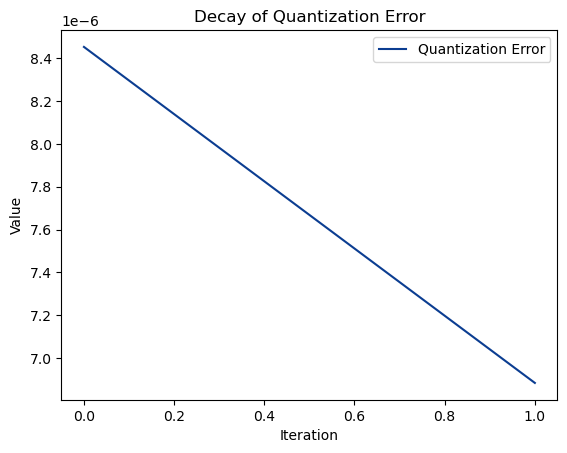

In [14]:
REDUCE = 500
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

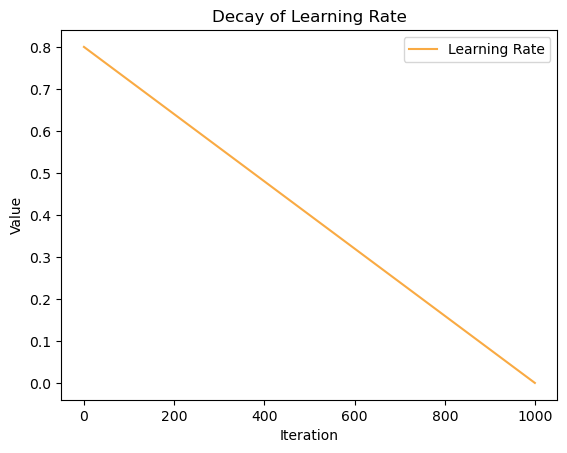

In [15]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

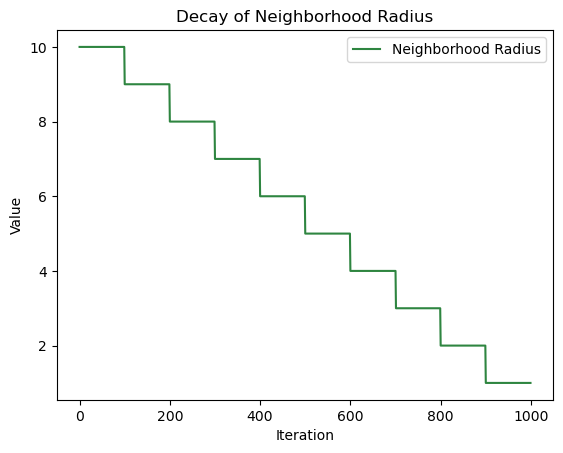

In [16]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

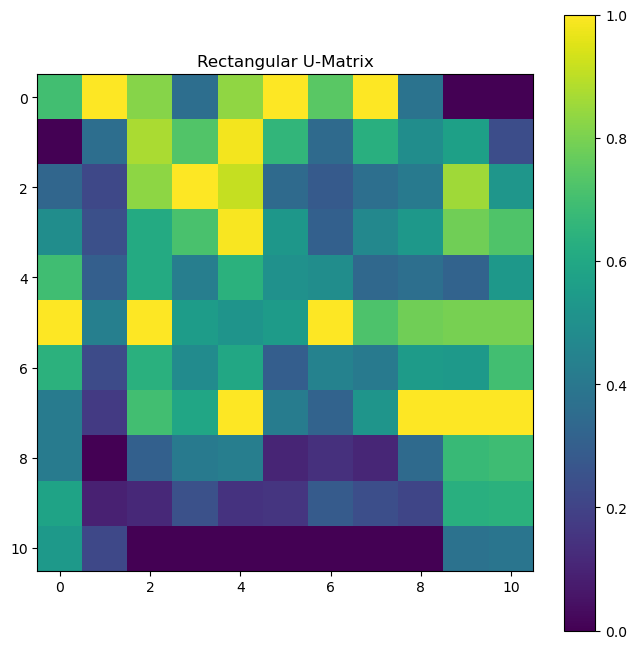

In [17]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

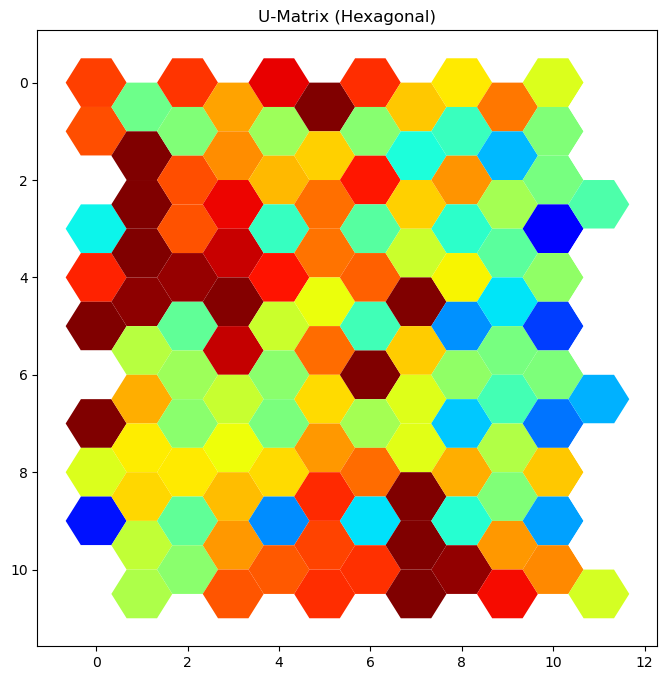

In [18]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

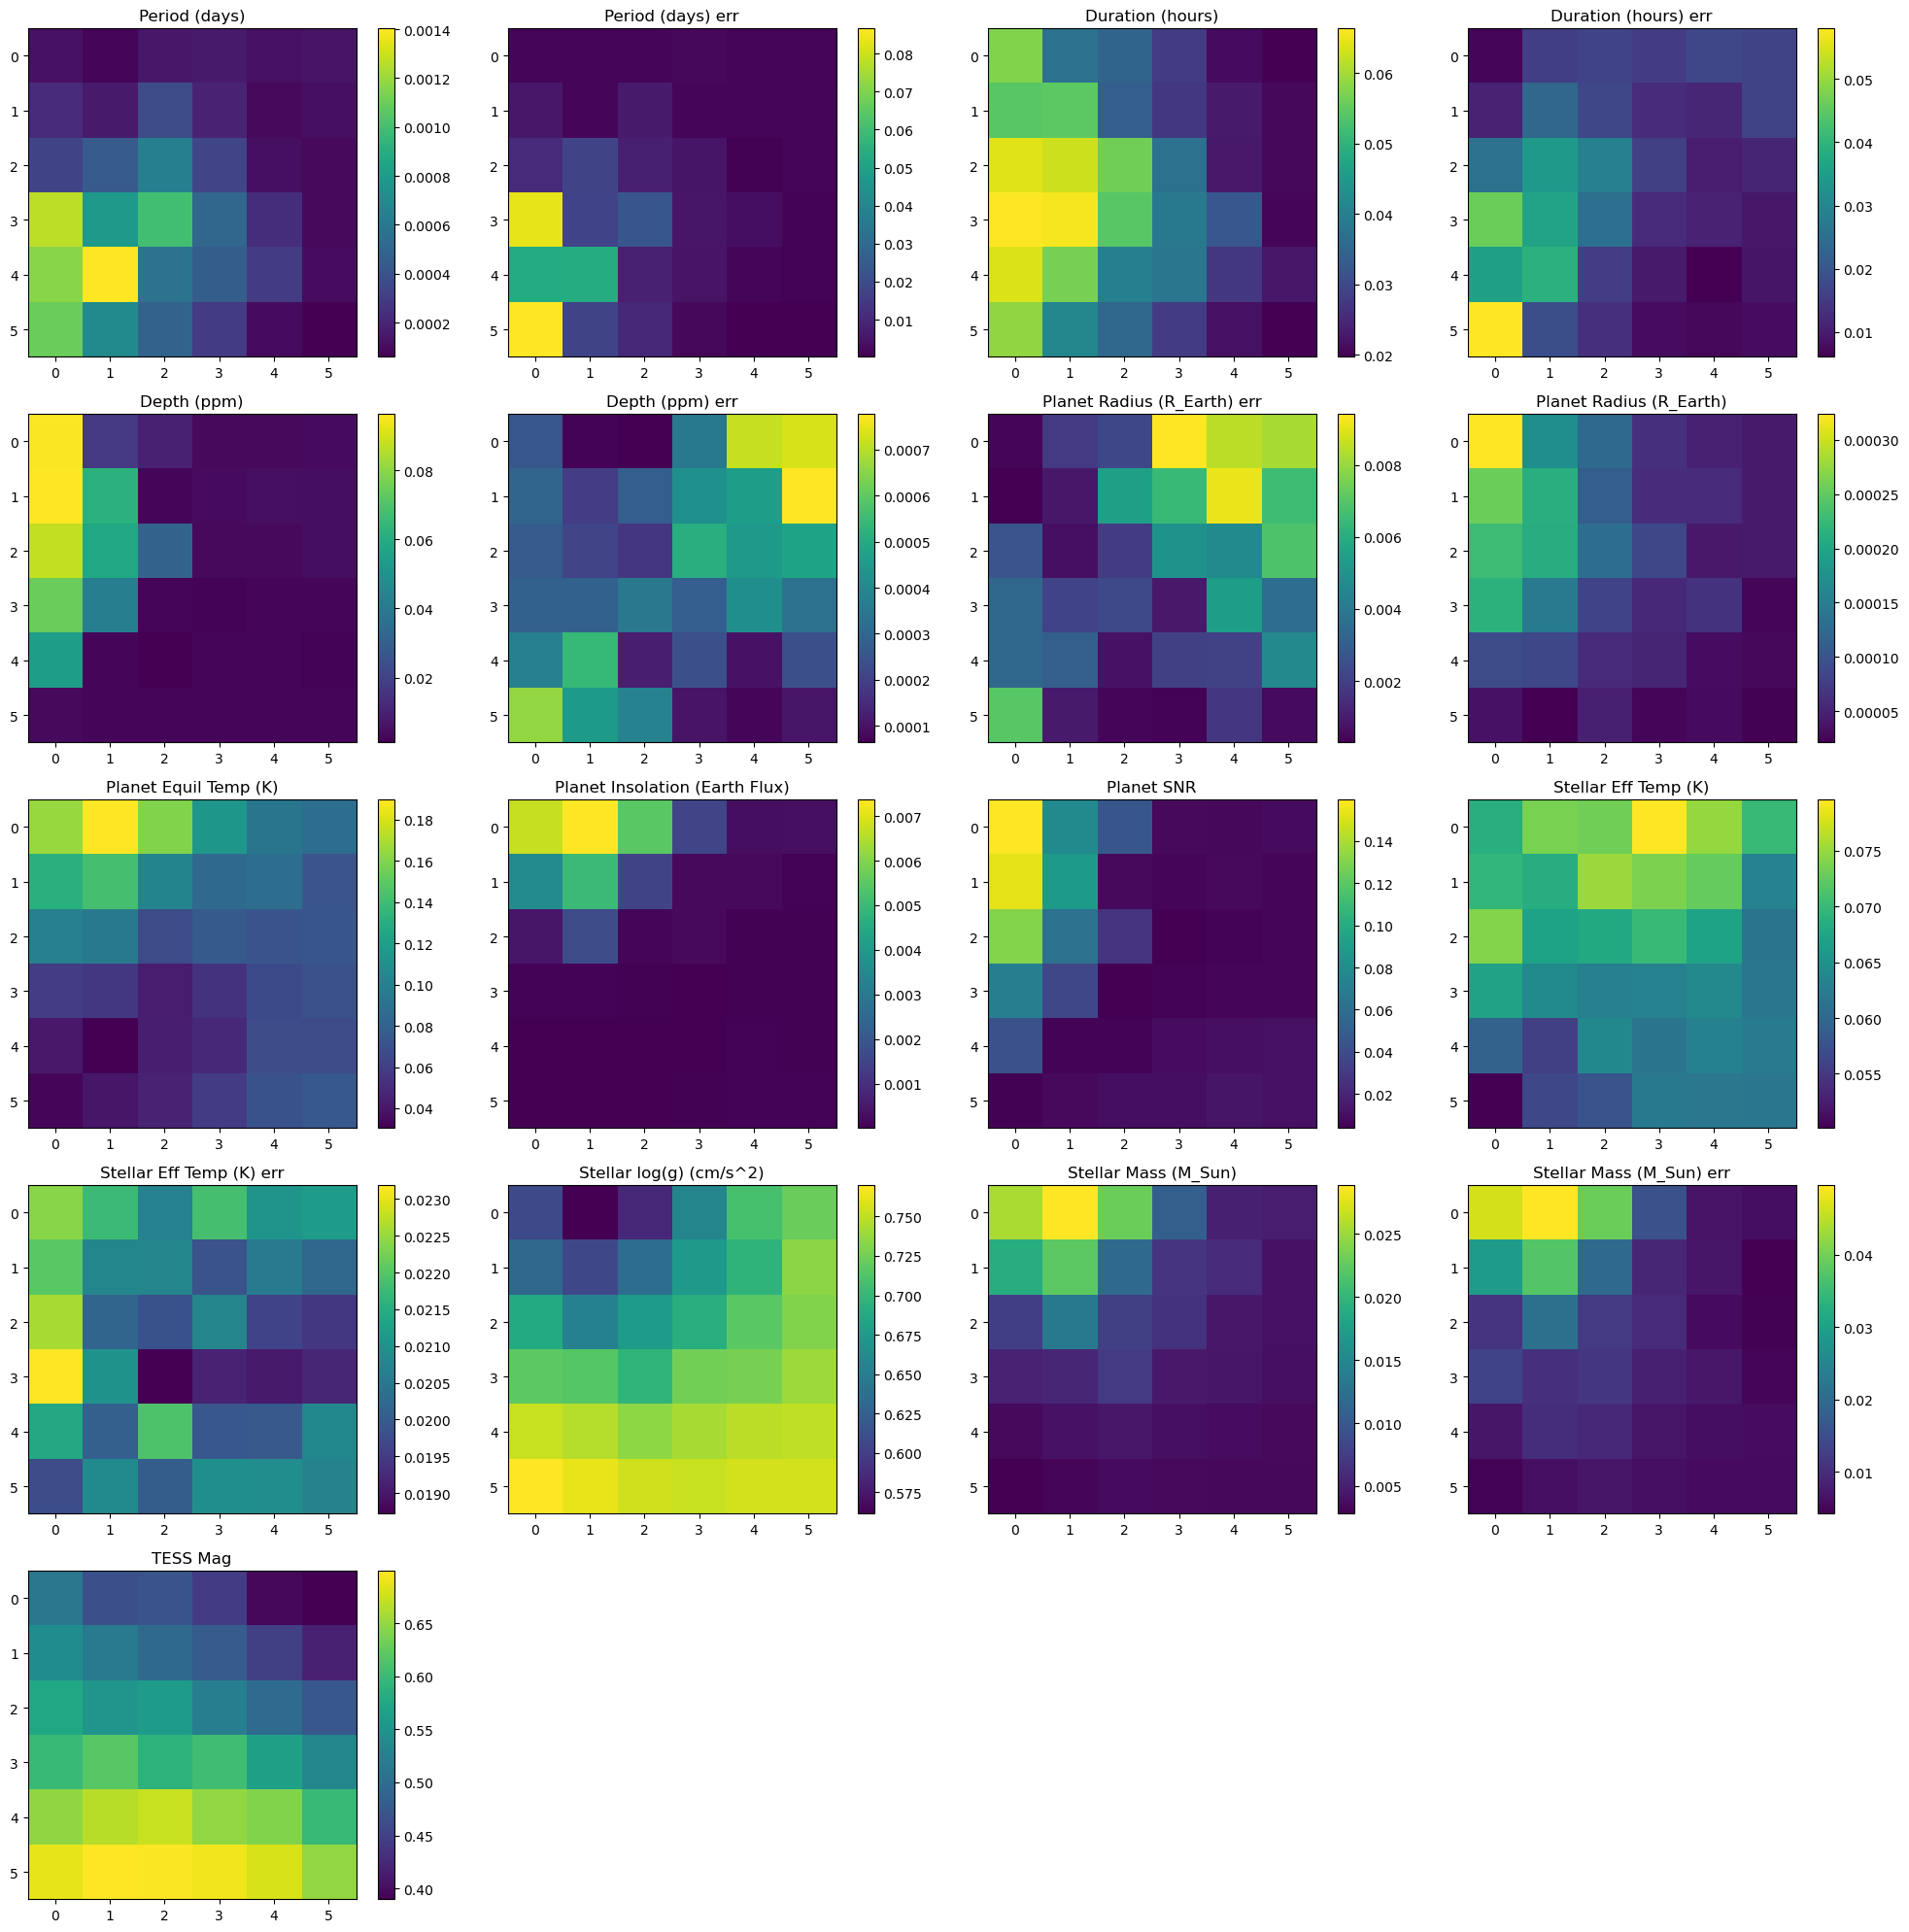

In [19]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [20]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

KeyboardInterrupt: 

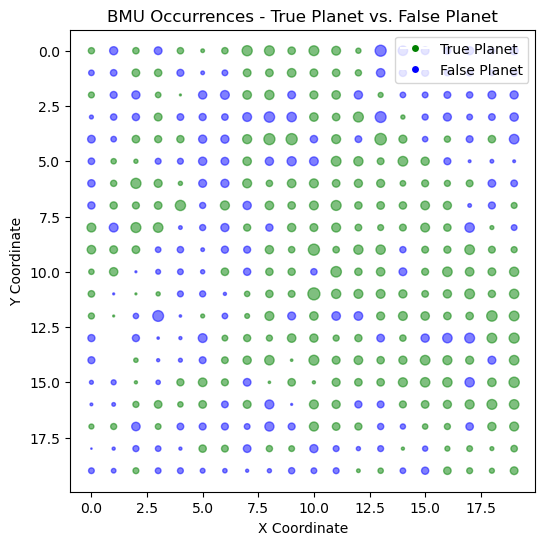

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [ ]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

In [ ]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

In [ ]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

In [ ]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

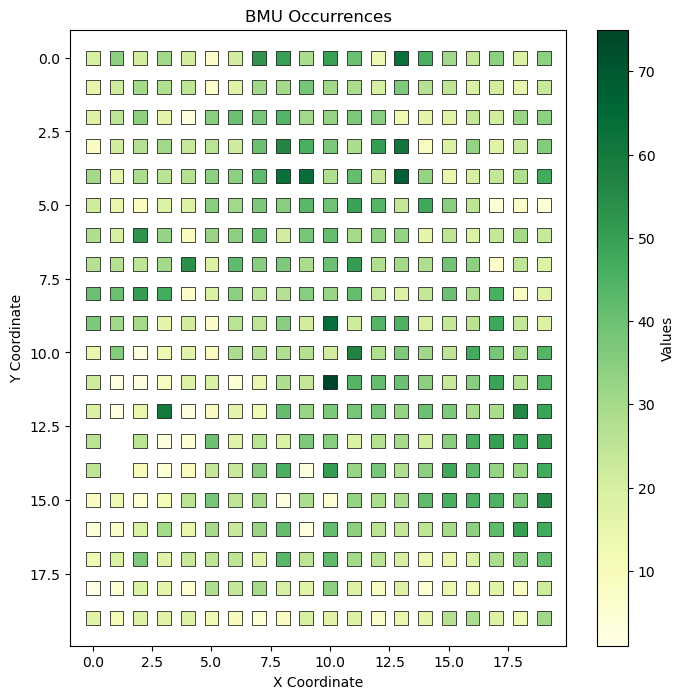

In [ ]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

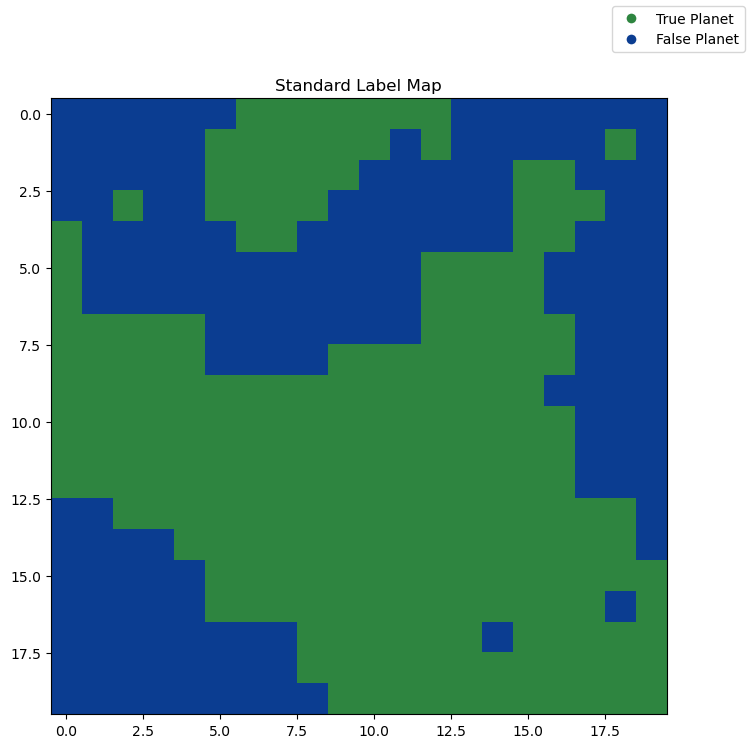

In [ ]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

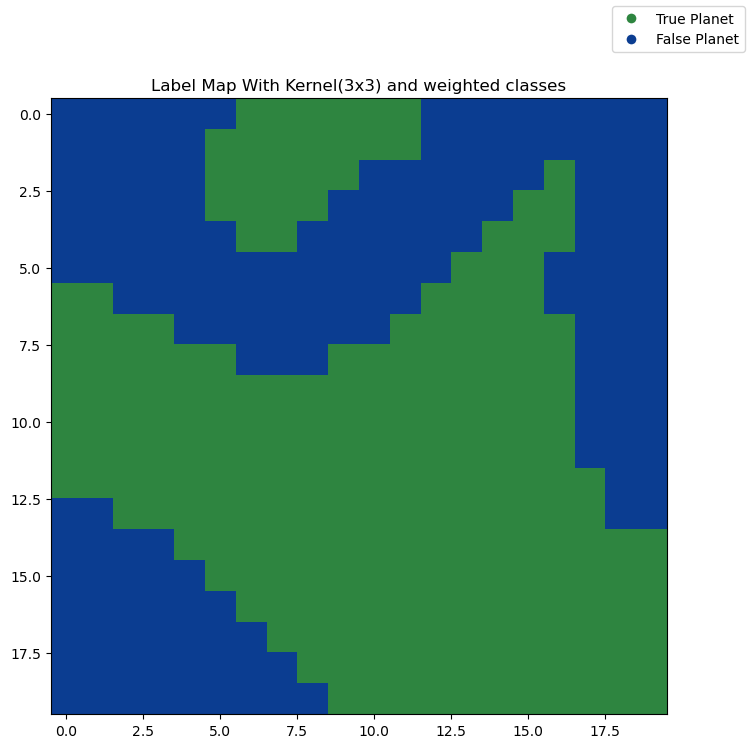

In [ ]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

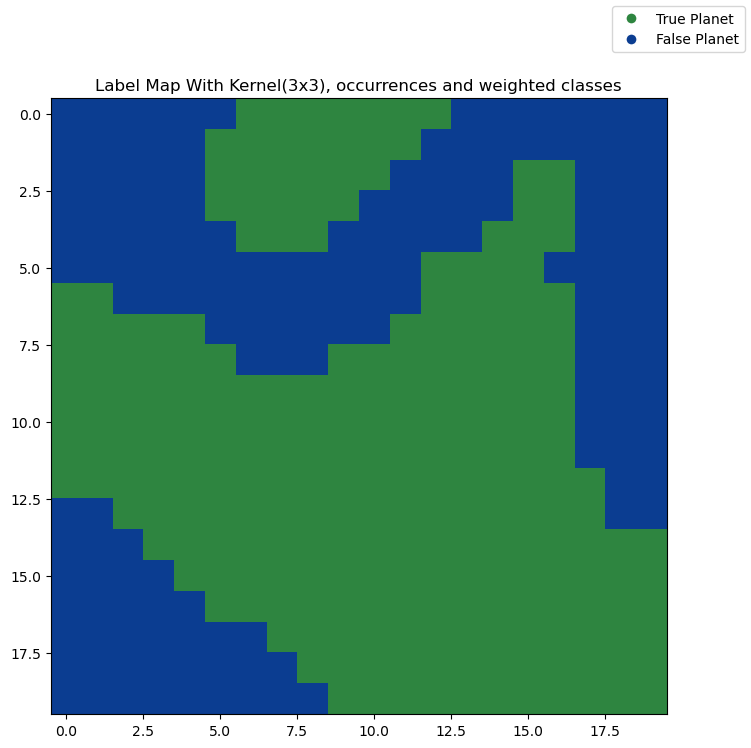

In [ ]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7804347826086957
F1-score: 0.8315730961645359
Precision: 0.7755313634007258
Recall: 0.896345116836429
cm:  [[ 658  433]
 [ 173 1496]]


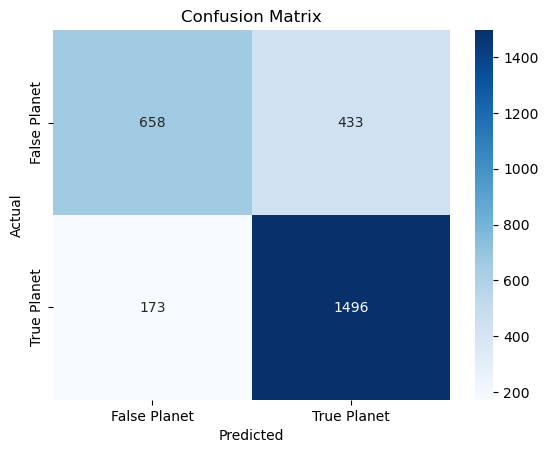

In [ ]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7764492753623189
F1-score: 0.8289437205433878
Precision: 0.7714138286893705
Recall: 0.895745955662073
cm:  [[ 648  443]
 [ 174 1495]]


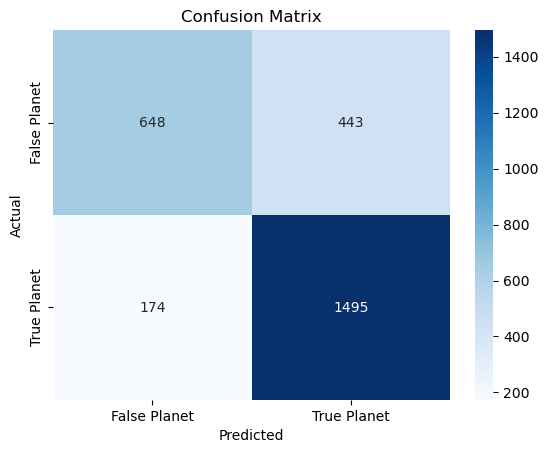

In [ ]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7760869565217391
F1-score: 0.8302197802197802
Precision: 0.7666159309994927
Recall: 0.9053325344517675
cm:  [[ 631  460]
 [ 158 1511]]


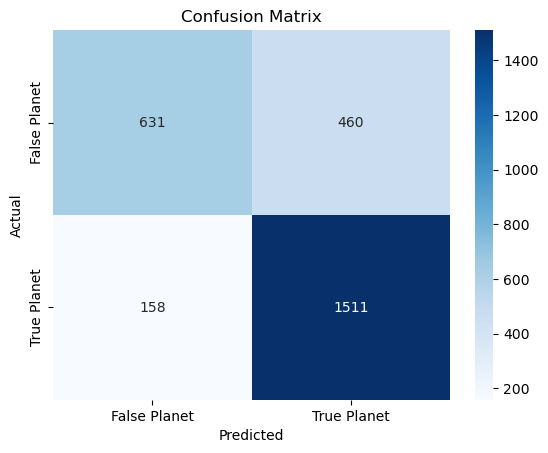

In [ ]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7793478260869565
F1-score: 0.8317214700193424
Precision: 0.7717948717948718
Recall: 0.9017375674056322
cm:  [[ 646  445]
 [ 164 1505]]


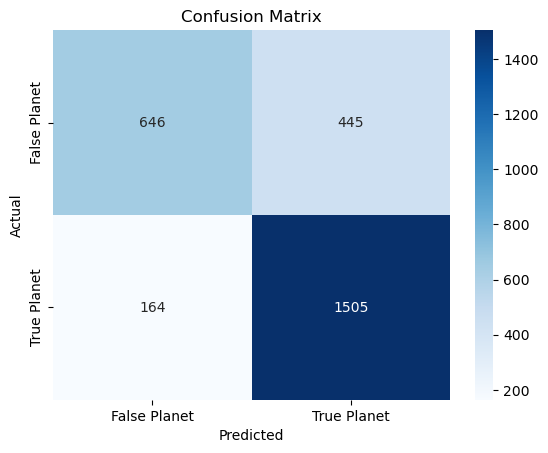

In [ ]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)